## Real Estate Price Prediction 

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
real_estate_data=pd.read_csv(r"C:\Users\ASUS VIVO\Desktop\a\Real_Estate.csv")

In [19]:
real_estate_data

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710
...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620


In [20]:
real_estate_data.columns

Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area'],
      dtype='object')

In [5]:
real_estate_data.info

<bound method DataFrame.info of                Transaction date  House age  \
0    2012-09-02 16:42:30.519336       13.3   
1    2012-09-04 22:52:29.919544       35.5   
2    2012-09-05 01:10:52.349449        1.1   
3    2012-09-05 13:26:01.189083       22.2   
4    2012-09-06 08:29:47.910523        8.5   
..                          ...        ...   
409  2013-07-25 15:30:36.565239       18.3   
410  2013-07-26 17:16:34.019780       11.9   
411  2013-07-28 21:47:23.339050        0.0   
412  2013-07-29 13:33:29.405317       35.9   
413  2013-08-01 09:49:41.506402       12.0   

     Distance to the nearest MRT station  Number of convenience stores  \
0                             4082.01500                             8   
1                              274.01440                             2   
2                             1978.67100                            10   
3                             1055.06700                             5   
4                              967.40000     

let's check whether our data have null value

In [21]:
real_estate_data.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

let see the descriptive value for our data

In [22]:
real_estate_data.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


## Data analysis for real_estate_data

In [23]:
real_estate_data.select_dtypes(include='float64').columns

Index(['House age', 'Distance to the nearest MRT station', 'Latitude',
       'Longitude', 'House price of unit area'],
      dtype='object')

In [24]:
real_estate_data['Number of convenience stores']=real_estate_data['Number of convenience stores'].astype('float64')

In [25]:
our_numeric_data=real_estate_data.select_dtypes(include='float64').columns
our_numeric_data


Index(['House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area'],
      dtype='object')

we create a histogram for our numeric entity

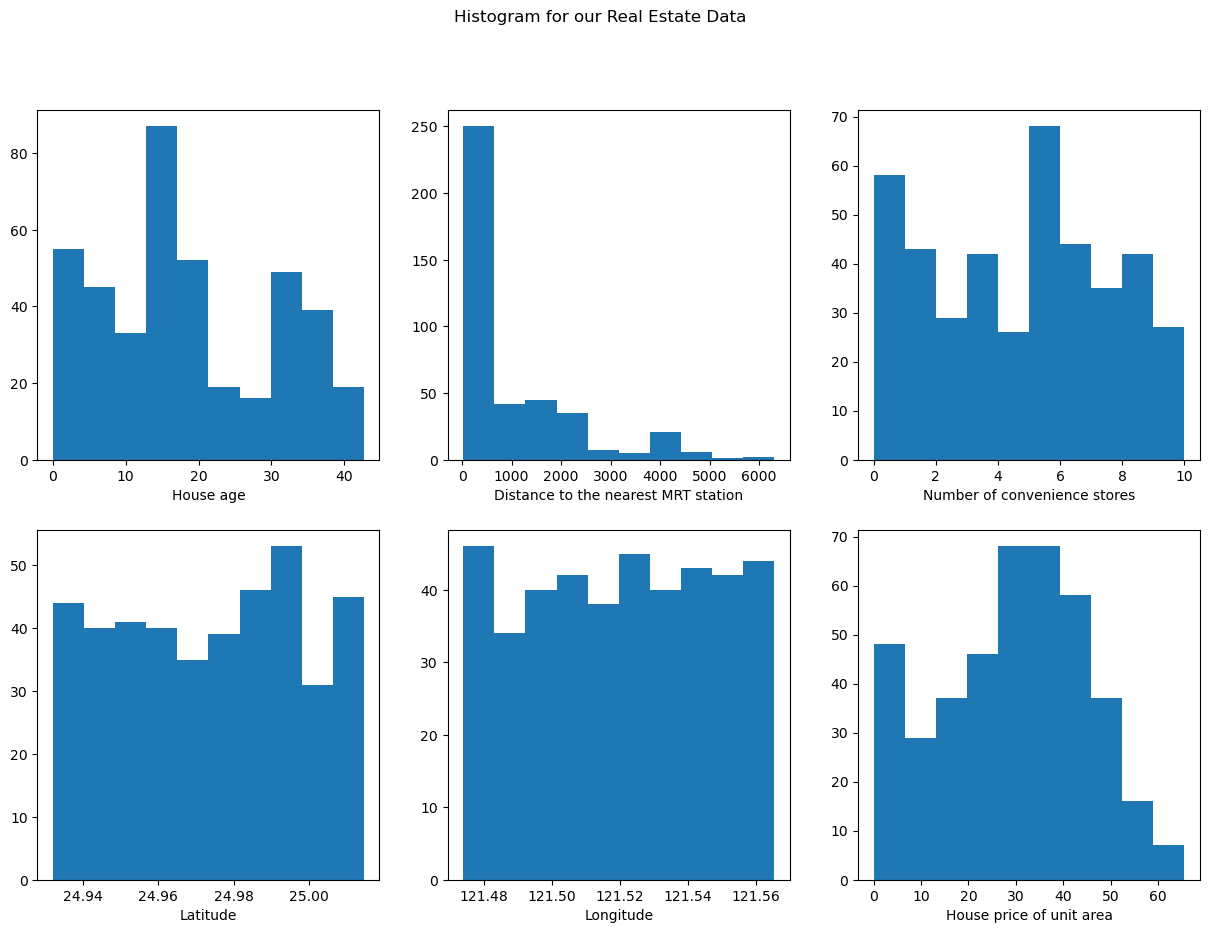

In [26]:
numeric_data=real_estate_data.select_dtypes(include='float64').columns
fig,axes=plt.subplots(2,3,figsize=(15,10))
axes=axes.flatten()

for i,column in enumerate(numeric_data):
    axes[i].hist(real_estate_data[column])
    axes[i].set_xlabel(column)
    
plt.suptitle('Histogram for our Real Estate Data') 
plt.show()

Next I will create scatter plot to see the r/ship b/n house price and this variables

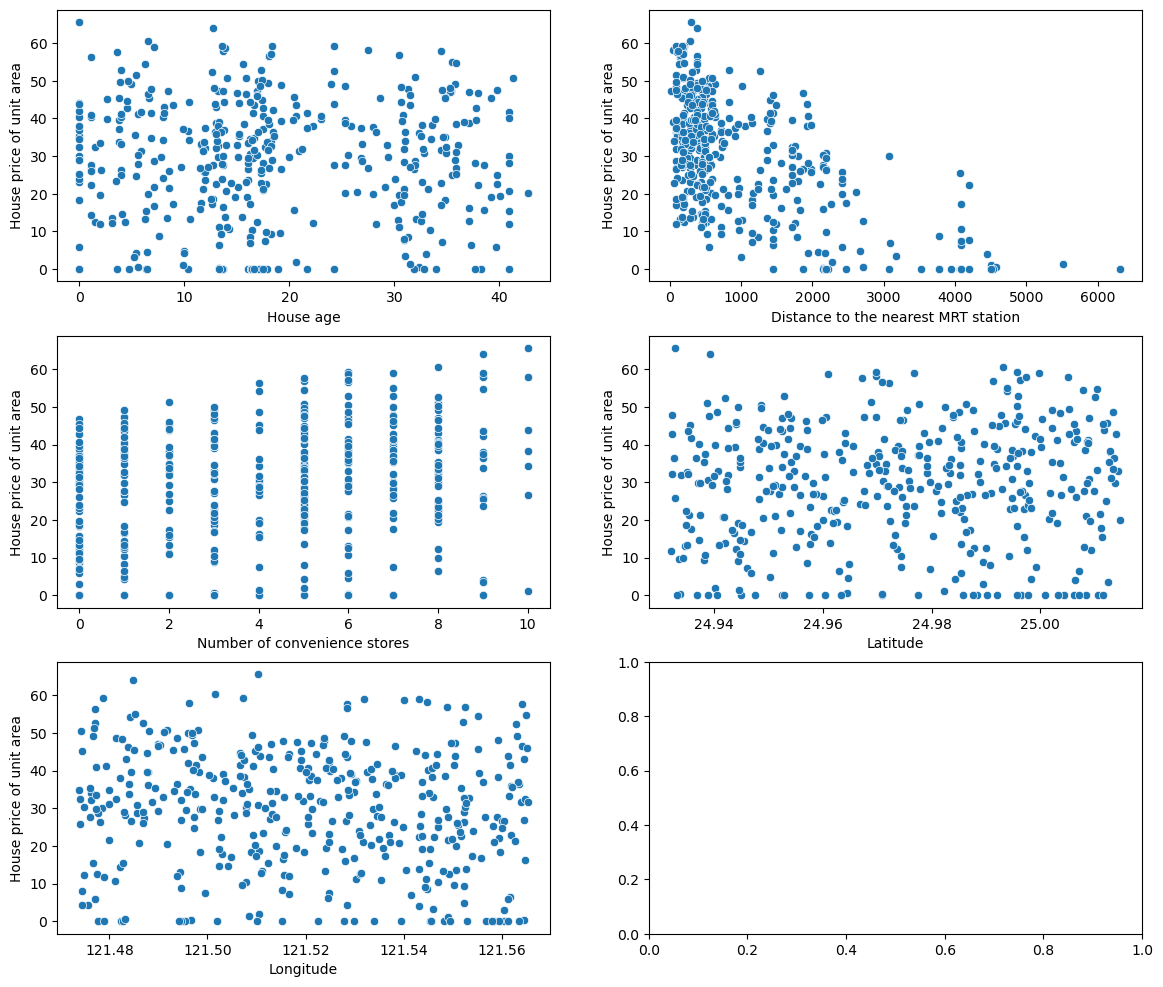

In [27]:
fig,axes=plt.subplots(3,2,figsize=(14,12))
sns.scatterplot(data=real_estate_data,y='House price of unit area',x="House age",ax=axes[0,0])
sns.scatterplot(data=real_estate_data,y='House price of unit area',x="Distance to the nearest MRT station",ax=axes[0,1])
sns.scatterplot(data=real_estate_data,y='House price of unit area',x="Number of convenience stores",ax=axes[1,0])
sns.scatterplot(data=real_estate_data,y='House price of unit area',x="Latitude",ax=axes[1,1])
sns.scatterplot(data=real_estate_data,y='House price of unit area',x="Longitude",ax=axes[2,0])
plt.show()


Let create a correlation using heatmap

<Axes: >

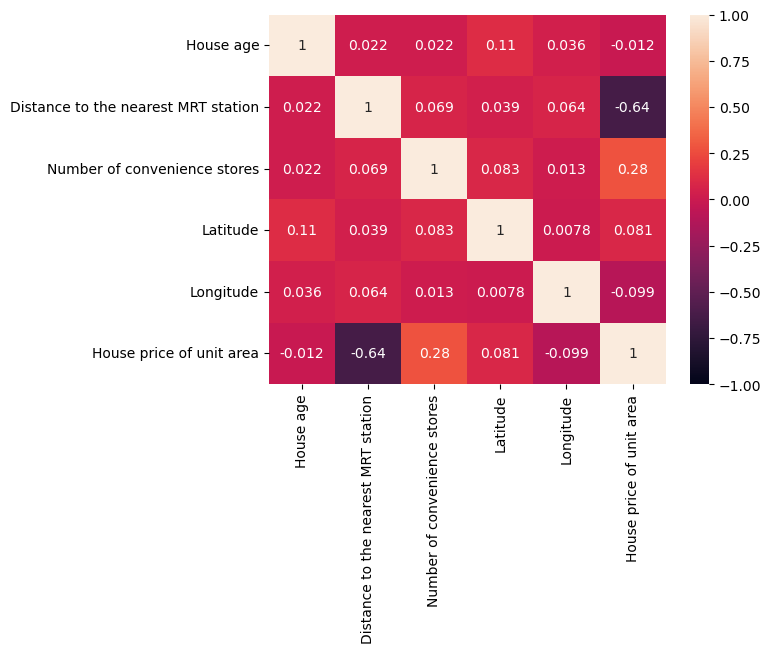

In [28]:
sns.heatmap(real_estate_data[our_numeric_data].corr(),vmax=1,vmin=-1,annot=True)


## Now let's build a regression model 
to pridict the real estate prices by using the Liner Regression algorithm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score



In [32]:
features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target='House price of unit area'
X=real_estate_data[features]
Y=real_estate_data[target]


In [37]:
# splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
model=LinearRegression()

In [39]:
model.fit(X_train,Y_train)

LinearRegression()

Visualize the actual versus predicted values

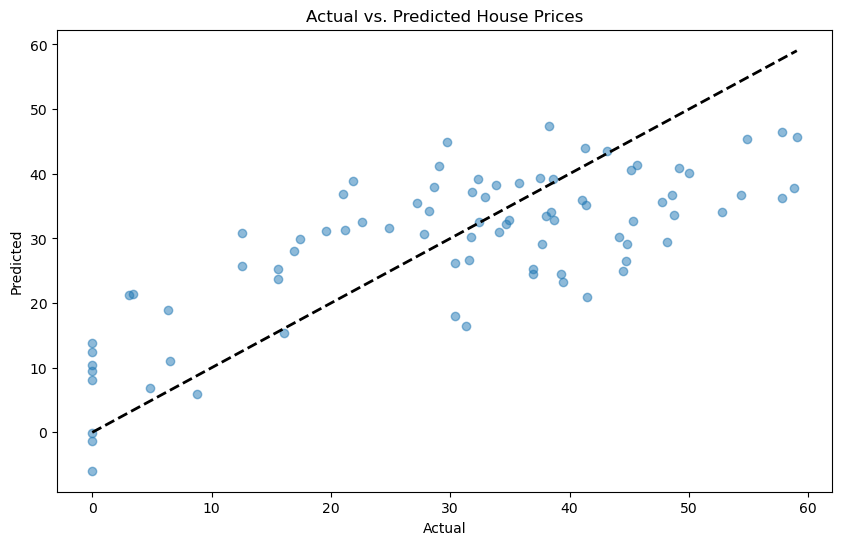

In [46]:

Y_pred_lr = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_lr, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()

In [45]:
import dash
from dash import html, dcc, Input, Output, State
import pandas as pd

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.Div([
        html.H1("Real Estate Price Prediction", style={'text-align': 'center'}),
        
        html.Div([
            dcc.Input(id='distance_to_mrt', type='number', placeholder='Distance to MRT Station (meters)',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='num_convenience_stores', type='number', placeholder='Number of Convenience Stores',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='latitude', type='number', placeholder='Latitude',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='longitude', type='number', placeholder='Longitude',
                      style={'margin': '10px', 'padding': '10px'}),
            html.Button('Predict Price', id='predict_button', n_clicks=0,
                        style={'margin': '10px', 'padding': '10px', 'background-color': '#007BFF', 'color': 'white'}),
        ], style={'text-align': 'center'}),
        
        html.Div(id='prediction_output', style={'text-align': 'center', 'font-size': '20px', 'margin-top': '20px'})
    ], style={'width': '50%', 'margin': '0 auto', 'border': '2px solid #007BFF', 'padding': '20px', 'border-radius': '10px'})
])

# Define callback to update output
@app.callback(
    Output('prediction_output', 'children'),
    [Input('predict_button', 'n_clicks')],
    [State('distance_to_mrt', 'value'), 
     State('num_convenience_stores', 'value'),
     State('latitude', 'value'),
     State('longitude', 'value')]
)
def update_output(n_clicks, distance_to_mrt, num_convenience_stores, latitude, longitude):
    if n_clicks > 0 and all(v is not None for v in [distance_to_mrt, num_convenience_stores, latitude, longitude]):
        # Prepare the feature vector
        features = pd.DataFrame([[distance_to_mrt, num_convenience_stores, latitude, longitude]], 
                                columns=['distance_to_mrt', 'num_convenience_stores', 'latitude', 'longitude'])
        # Predict
        prediction = model.predict(features)[0]
        return f'Predicted House Price of Unit Area: {prediction:.2f}'
    elif n_clicks > 0:
        return 'Please enter all values to get a prediction'
    return ''

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

## Summary
An End-to-End Machine Learning Model is a comprehensive system that contains all the stages of a machine learning project, from data collection and preprocessing to model development, deployment, and ongoing maintenance.